# Tarea 9

## E1



Queremos minimizar esta función:
$$Var(\alpha X + (1 - \alpha)Y)$$

Recordando las reglas básicas de estadística, la varianza de una suma se expande así:
$$Var(aX + bY) = a^2Var(X) + b^2Var(Y) + 2abCov(X, Y)$$

Sustituyendo nuestros términos ($a=\alpha$ y $b=1-\alpha$):
$$f(\alpha) = \alpha^2 \sigma_X^2 + (1-\alpha)^2 \sigma_Y^2 + 2\alpha(1-\alpha) \sigma_{XY}$$

Ahora aplicamos cálculo básico (derivamos respecto a $\alpha$ e igualamos a 0 para buscar el mínimo):

$$\frac{d}{d\alpha} f(\alpha) = 2\alpha \sigma_X^2 + 2(1-\alpha)(-1)\sigma_Y^2 + 2\sigma_{XY}(1-2\alpha) = 0$$


Simplificamos y agrupamos los términos que tienen $\alpha$:
$$2\alpha \sigma_X^2 - 2(1-\alpha)\sigma_Y^2 + 2\sigma_{XY} - 4\alpha \sigma_{XY} = 0$$

Dividimos todo entre 2 para limpiar:
$$\alpha \sigma_X^2 - (1-\alpha)\sigma_Y^2 + \sigma_{XY} - 2\alpha \sigma_{XY} = 0$$
$$\alpha \sigma_X^2 - \sigma_Y^2 + \alpha\sigma_Y^2 + \sigma_{XY} - 2\alpha \sigma_{XY} = 0$$

Ahora factorizamos $\alpha$:
$$\alpha (\sigma_X^2 + \sigma_Y^2 - 2\sigma_{XY}) = \sigma_Y^2 - \sigma_{XY}$$

Y despejamos:
$$\alpha = \frac{\sigma_Y^2 - \sigma_{XY}}{\sigma_X^2 + \sigma_Y^2 - 2\sigma_{XY}}$$


---

## E2

Supongamos que tenemos un set de datos original con $n$ observaciones y hacemos un muestreo *con reemplazo*. Queremos ver qué probabilidad hay de que una observación específica (la $j$-ésima) se quede fuera.

### (a) Probabilidad de que la 1ra observación del bootstrap NO sea la $j$-ésima

Como es un muestreo aleatorio simple:
* Probabilidad de elegir la $j$-ésima = $1/n$
* Probabilidad de **NO** elegirla = El resto ($1 - 1/n$)

$$P(\text{No es } j) = 1 - \frac{1}{n}$$

### (b) Probabilidad de que la 2da observación NO sea la $j$-ésima

Como el bootstrap es **con reemplazo**, lo que pasó en la primera extracción no afecta a la segunda. Por ejemplo en un mazo de cartas, tu sacas una y la vuelves a meter al mazo por lo que la probabilidad es la misma:

$$P(\text{2da no es } j) = 1 - \frac{1}{n}$$

### (c) Probabilidad de que la $j$-ésima observación NUNCA aparezca en la muestra

En este caso al tener reemplazo, simplemente se van multiplicando las probabilidades por lo que la probabilidad que no salga la observacion $j$-ésima asi hasta que salga


$$P(\text{Fuera del sample}) = \left(1 - \frac{1}{n}\right) \times \left(1 - \frac{1}{n}\right) \dots \text{($n$ veces)}$$

Lo que nos deja con la fórmula final:

$$P(\text{Observación } j \text{ no está en el bootstrap}) = \left(1 - \frac{1}{n}\right)^n$$

*(Dato extra: Si $n$ es muy grande, esto se acerca a $1/e \approx 36.8\%$(con n=1000 da 36.77%). O sea, casi 1/3 de tus datos originales se pierden en cada muestra bootstrap)*


### (d) cuando n=5, cual es la probabilidad de que salga la $j$-ésima observación

$$P(\text{Observación } j \text{ NO salga con n=5}) = \left(1 - \frac{1}{5}\right)^5$$

y si buscamos que si salga solo es 1- formula o se veria algo asi

$$P(\text{Observación } j \text{ salga con n=5}) = 1- \left(1 - \frac{1}{5}\right)^5$$


que nos da un resultado de 0.32768 por lo que es su complemento que es 1- 0.32768 que es 0.67232



### (e) Cuando n = 100

Ahora con $n=100$:

$$P(\text{Salga con n=100}) = 1 - \left(1 - \frac{1}{100}\right)^{100} = \mathbf{0.634}$$

### (f) Cuando n = 10,000

Con un $n$ muy grande:

$$P(\text{Salga con n=10000}) = 1 - \left(1 - \frac{1}{10000}\right)^{10000} = \mathbf{0.632}$$


### (g) Gráfica de Probabilidad ($n=1$ a $100,000$)





In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import LeaveOneOut, cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.metrics import r2_score, make_scorer, roc_auc_score
from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings('ignore')
import optuna
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,classification_report
from ISLP import load_data


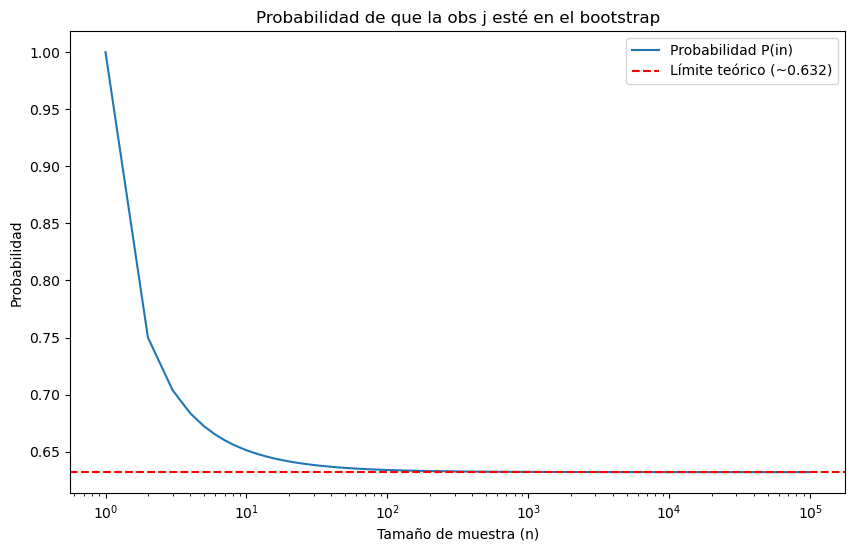

In [7]:

n_values = np.arange(1, 100001)
probs = 1 - (1 - 1/n_values)**n_values
plt.figure(figsize=(10, 6))
plt.plot(n_values, probs, label='Probabilidad P(in)')

plt.xscale('log') 

limit = 1 - 1/np.e
plt.axhline(y=limit, color='r', linestyle='--', label=f'Límite teórico (~{limit:.3f})')

plt.xlabel('Tamaño de muestra (n)')
plt.ylabel('Probabilidad')
plt.title('Probabilidad de que la obs j esté en el bootstrap')
plt.legend()

plt.show()


### (h) Investigación Numérica (Simulación montecarlo)

En lugar de usar fórmulas, vamos a "forzar" a la computadora a crear muestras aleatorias y contar cuántas veces aparece el número 4. Haremos esto muchas veces (ej. 10,000 veces) para sacar un promedio.


In [8]:

n = 100 
simulaciones = 10000 
target = 4 
exitos = 0

for _ in range(simulaciones):
    boot_sample = np.random.choice(np.arange(1, n+1), size=n, replace=True)
    
    if target in boot_sample:
        exitos += 1

probabilidad_simulada = exitos / simulaciones

print(f"Probabilidad simulada después de {simulaciones} intentos: {probabilidad_simulada}")


Probabilidad simulada después de 10000 intentos: 0.6342


como vemos numericamente tiende al porcentaje propuesto(63.2%) cuando n es muy grande por lo que la teoria y la practica si van de la mano 

## E3

### (a) Explica como se usa el k-fold cross validation

El k-fold cross validation se usa para separar k veces nuestro dataset y solo tomar una muestra para ver si al no usar una parte de la muestra (Se separapara poder evaluar nuestro modelo hecho con todas las otras partes de nuestra informacion), deja de representar a los datos o generaliza aun quitandole esa parte de entrenamiento. Se suele medir con la media y la desviacion estandar del MSE de cada modelo propuesto. 

### (b) Cuales son las ventajas y desventajas de usar k folds en ves de: [ separarlos en train y test, usar Leave One Out Cross Validation]

las ventajas de usar el kfolds en ves de solo separarlos en train y test es que uno quiere usar la mayor informacion posible para poder entrenar a nuestro modelo o puede que en la parte de test estemos dejando una parte esencial de nuestro modelo y por esto se nos dispara el error y tenemos un $R^2$ muy bajo por lo que en k-folds se separa la muestra y vamos viendo modelo por modelo sin desperdiciar informacion y la desventaja es lo sencillo que es hacer un Train y test

Ahora en el caso de LOOCV, es muy bueno por que se prueban todos los modelos posibles por lo que tu k = a los numeros de datos que tienes, el problema es el poder computacional si tenemos muchos datos, puede tardarse en hacer todos los modelos.


## E4 
### como calcularias la desviacion estandar de tu modelo de aprendizaje estadistico 

Le aplicas un bootstrap a tu modelo para poder obtener mas muestras, predices con cada uno de tus modelos de bootstrap y vas guardando la prediccion, a esto le sacas la desviacion estandar y ahi quedo


## E5

In [9]:
%pip install ISLP

### a)

In [10]:
df2=pd.read_csv(r"D:\Default.csv")
X = df2[['balance', 'income']]
y = df2['default'].map({'Yes': 1, 'No': 0})
LOGR = LogisticRegression()
LOGR.fit(X, y)


LogisticRegression()

In [11]:
df2.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138950
3,No,No,529.250605,35704.493940
4,No,No,785.655883,38463.495880


### b)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
LOGR.fit(X_train,y_train)
ypred=LOGR.predict(X_test)
failure = np.mean(ypred != y_test)
print(f'Failure rate: {failure:.4f}')

Failure rate: 0.0305


### C)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
LOGR.fit(X_train,y_train)
ypred=LOGR.predict(X_test)
failure = np.mean(ypred != y_test)
print(f'Failure rate: {failure:.4f}')

Failure rate: 0.0267


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
LOGR.fit(X_train,y_train)
ypred=LOGR.predict(X_test)
failure = np.mean(ypred != y_test)
print(f'Failure rate: {failure:.4f}')

Failure rate: 0.0272


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
LOGR.fit(X_train,y_train)
ypred=LOGR.predict(X_test)
failure = np.mean(ypred != y_test)
print(f'Failure rate: {failure:.4f}')

Failure rate: 0.0330


como podemos ver, no importa tanto el test size, lo que mas importa es si toma los datos mas importante para el modelo, ya que no crece o disminuye de forma lineal si por lo que podemos ver en este caso.

### D)

In [16]:
df2['student']= df2['student'].map({'Yes': 1, 'No': 0})
df2['default'] = df2['default'].map({'Yes': 1, 'No': 0})


In [17]:
X = df2[['balance', 'income','student']]
y = df2['default']

LOGR.fit(X, y)

LogisticRegression()

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
LOGR.fit(X_train,y_train)
ypred=LOGR.predict(X_test)
failure = np.mean(ypred != y_test)
print(f'Failure rate: {failure:.4f}')

Failure rate: 0.0305


no cambia nada, me dio el mismo valor de failure rate

## E6

## a)

In [19]:
X_df = df2[['balance', 'income']]
X_df = sm.add_constant(X_df)
y = df2['default']
modelo_sm = sm.GLM(y, X_df)
resultado = modelo_sm.fit()
print(resultado.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                default   No. Observations:                10000
Model:                            GLM   Df Residuals:                     9997
Model Family:                Gaussian   Df Model:                            2
Link Function:               Identity   Scale:                        0.028217
Method:                          IRLS   Log-Likelihood:                 3651.3
Date:                Fri, 28 Nov 2025   Deviance:                       282.08
Time:                        15:53:08   Pearson chi2:                     282.
No. Iterations:                     3   Pseudo R-squ. (CS):             0.1316
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0922      0.006    -15.936      0.0

### b)

In [20]:

def boot_fn(data, indices):
    datos = data.iloc[indices]
    X_sample = datos[['balance', 'income']]
    y_sample = datos['default']
    model = sm.GLM(y_sample, sm.add_constant(X_sample))
    result = model.fit()
    return result.params[0], result.params[1], result.params[2], result.bse[0], result.bse[1], result.bse[2]


### c)

In [21]:
boot_fn(df2, np.arange(len(df2)))
print(f"intercept coef: {boot_fn(df2, np.arange(len(df2)))[0]:.4f}")
print(f"balance coef: {boot_fn(df2, np.arange(len(df2)))[1]:.4f}")
print(f"income coef: {boot_fn(df2, np.arange(len(df2)))[2]:.4f}")
print(f"intercept std err: {boot_fn(df2, np.arange(len(df2)))[3]:.4f}")
print(f"balance std err: {boot_fn(df2, np.arange(len(df2)))[4]:.4f}")
print(f"income std err: {boot_fn(df2, np.arange(len(df2)))[5]:.4f}")

intercept coef: -0.0922
balance coef: 0.0001
income coef: 0.0000
intercept std err: 0.0058
balance std err: 0.0000
income std err: 0.0000


### d)

si comparamos uno por uno, los resultados son exactamente los mismos que sale en la funcion que ya viene en la libreria de stats modela

In [22]:
Weekly = load_data('Weekly')

print(Weekly.head())

   Year   Lag1   Lag2   Lag3   Lag4   Lag5    Volume  Today Direction
0  1990  0.816  1.572 -3.936 -0.229 -3.484  0.154976 -0.270      Down
1  1990 -0.270  0.816  1.572 -3.936 -0.229  0.148574 -2.576      Down
2  1990 -2.576 -0.270  0.816  1.572 -3.936  0.159837  3.514        Up
3  1990  3.514 -2.576 -0.270  0.816  1.572  0.161630  0.712        Up
4  1990  0.712  3.514 -2.576 -0.270  0.816  0.153728  1.178        Up


In [23]:
X = Weekly[['Lag1', 'Lag2']]
y = Weekly['Direction'].map({'Up': 1, 'Down': 0}).astype(int)
LOGR_A=LogisticRegression()
LOGR_B=LogisticRegression()
LOGR_A.fit(X, y)
X_sm = sm.add_constant(X)
modelo_sm_weekly = sm.Logit(y, X_sm)
resultado_weekly = modelo_sm_weekly.fit(disp=False)
resultado_weekly.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Direction   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1086
Method:                           MLE   Df Model:                            2
Date:                Fri, 28 Nov 2025   Pseudo R-squ.:                0.005335
Time:                        15:53:08   Log-Likelihood:                -744.11
converged:                       True   LL-Null:                       -748.10
Covariance Type:            nonrobust   LLR p-value:                   0.01848
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2212      0.061      3.599      0.000       0.101       0.342
Lag1          -0.0387      0.026     -1.477      0.140      -0.090       0.013
Lag2           0.0602      0.027      2.270      0.023       0.008       0.112
==============================================================================
"""

In [24]:
X = X.iloc[1:]
y = y.iloc[1:]
LOGR_B.fit(X, y)
X_sm = sm.add_constant(X)
modelo_sm_weekly = sm.Logit(y, X_sm)
resultado_weekly = modelo_sm_weekly.fit(disp=False)
resultado_weekly.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Direction   No. Observations:                 1088
Model:                          Logit   Df Residuals:                     1085
Method:                           MLE   Df Model:                            2
Date:                Fri, 28 Nov 2025   Pseudo R-squ.:                0.005387
Time:                        15:53:08   Log-Likelihood:                -743.26
converged:                       True   LL-Null:                       -747.29
Covariance Type:            nonrobust   LLR p-value:                   0.01785
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2232      0.061      3.630      0.000       0.103       0.344
Lag1          -0.0384      0.026     -1.466      0.143      -0.090       0.013
Lag2           0.0608      0.027      2.291      0.022       0.009       0.113
==============================================================================
"""

## E7

### a)

In [25]:
dfw = load_data('Weekly')

dfw.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up


In [26]:
X = dfw[['Lag1', 'Lag2']]
y = dfw['Direction'].map({'Up': 1, 'Down': 0}).astype(int)
LOGR_A = LogisticRegression()
LOGR_A.fit(X, y)
print("Intercept:", LOGR_A.intercept_)
print("Coefficients (Lag1, Lag2):", LOGR_A.coef_.ravel())

X_sm = sm.add_constant(X)
model = sm.Logit(y, X_sm)
result = model.fit(disp=False)
result.summary()

Intercept: [0.22122423]
Coefficients (Lag1, Lag2): [-0.03869725  0.06020635]


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Direction   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1086
Method:                           MLE   Df Model:                            2
Date:                Fri, 28 Nov 2025   Pseudo R-squ.:                0.005335
Time:                        15:53:08   Log-Likelihood:                -744.11
converged:                       True   LL-Null:                       -748.10
Covariance Type:            nonrobust   LLR p-value:                   0.01848
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2212      0.061      3.599      0.000       0.101       0.342
Lag1          -0.0387      0.026     -1.477      0.140      -0.090       0.013
Lag2           0.0602      0.027      2.270      0.023       0.008       0.112
==============================================================================
"""

### b)

In [27]:
x_2 = X.iloc[1:]
y_2 = y.iloc[1:]

LOGR_B = LogisticRegression()
LOGR_B.fit(x_2, y_2)

print("Intercept:", LOGR_B.intercept_)
print("Coefficients (Lag1, Lag2):", LOGR_B.coef_.ravel())

# Obtener un resumen estadístico usando statsmodels (sm ya está importado en otra celda)
X_dropped = sm.add_constant(x_2)
modelo = sm.Logit(y_2, X_dropped)
results = modelo.fit(disp=False)
print("\nStatsmodels Logit summary:")
results.summary()

Intercept: [0.22324303]
Coefficients (Lag1, Lag2): [-0.03840843  0.06080518]

Statsmodels Logit summary:


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Direction   No. Observations:                 1088
Model:                          Logit   Df Residuals:                     1085
Method:                           MLE   Df Model:                            2
Date:                Fri, 28 Nov 2025   Pseudo R-squ.:                0.005387
Time:                        15:53:08   Log-Likelihood:                -743.26
converged:                       True   LL-Null:                       -747.29
Covariance Type:            nonrobust   LLR p-value:                   0.01785
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2232      0.061      3.630      0.000       0.103       0.344
Lag1          -0.0384      0.026     -1.466      0.143      -0.090       0.013
Lag2           0.0608      0.027      2.291      0.022       0.009       0.113
==============================================================================
"""

### c)

In [28]:
print(LOGR_B.predict(x_2.iloc[0:1]))

[1]


### d)

In [29]:
x_2 = x_2.reset_index(drop=True)
y_2 = y_2.reset_index(drop=True)
n=len(x_2)
errors = []
for i in range(n):
    X_train = x_2.drop(index=i)
    y_train = y_2.drop(index=i)
    X_test = x_2.iloc[i:i+1]
    y_test = y_2.iloc[i:i+1]
    
    LOGR.fit(X_train, y_train)
    y_pred = LOGR.predict(X_test)
    error = int(y_pred != y_test)
    errors.append(error)



In [30]:
np.mean(errors)

0.4485294117647059

se equivoca casi el 50% de los casos por lo que no es buen modelo o no generaliza

## E8

### a)

In [31]:
import numpy as np
np.random.seed(42)
x = np.random.normal(size=100)
y = x - 2 * (x**2) + np.random.normal(size=100)
print(len(x))
print(1)

100
1


### b)

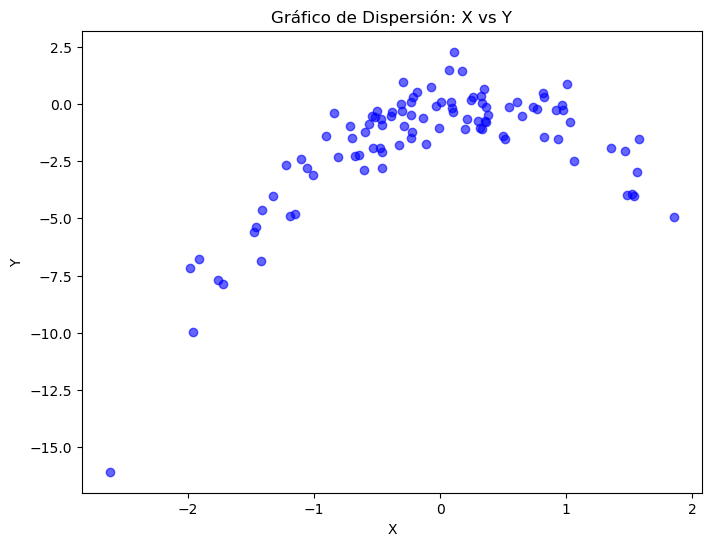

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(x,y, color='blue', alpha=0.6)
plt.title('Gráfico de Dispersión: X vs Y')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

aca vemos el factor de aleatoridadad agregado en la grafica o el error y es una grafica curveada por el $-2x^2$

### c)

In [33]:


np.random.seed(42)

loo = LeaveOneOut()
cv_errors = []
x2=x.reshape(-1,1)
y2=y.reshape(-1,1)
for degree in [1, 2, 3, 4]:
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    scores = cross_val_score(model, x2, y2, cv=loo, scoring='neg_mean_squared_error')
    mean_mse = -scores.mean()
    cv_errors.append(mean_mse)
    
    print(f"Modelo grado {degree}: MSE = {mean_mse:.5f}")

Modelo grado 1: MSE = 5.30296
Modelo grado 2: MSE = 0.91276
Modelo grado 3: MSE = 0.95696
Modelo grado 4: MSE = 0.97277


### d)

In [34]:
np.random.seed(1)

loo = LeaveOneOut()
cv_errors = []
x2=x.reshape(-1,1)
y2=y.reshape(-1,1)
for degree in [1, 2, 3, 4]:
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    scores = cross_val_score(model, x2, y2, cv=loo, scoring='neg_mean_squared_error')
    mean_mse = -scores.mean()
    cv_errors.append(mean_mse)
    
    print(f"Modelo grado {degree}: MSE = {mean_mse:.5f}")

Modelo grado 1: MSE = 5.30296
Modelo grado 2: MSE = 0.91276
Modelo grado 3: MSE = 0.95696
Modelo grado 4: MSE = 0.97277


da lo mismo  tiene sentido por que no hay forma de darle aletoridad al leave one out, tal vez si le cambiamos la semilla cuando definimos nuestras variables si de distinto

### e)

el modelo con mejor MSE es el modelo de grado 2 que tiene sentido ya que nuestra funcion es $$y=x-2x^2+ e$$

### f)

In [35]:
for i in [1, 2, 3, 4]:
    model = sm.OLS(y, sm.add_constant(np.vander(x, N=i+1, increasing=True)))
    results = model.fit()
    print(f"Modelo {i} (Polinomio grado {i}):")
    print(results.summary())

Modelo 1 (Polinomio grado 1):
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.299
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     41.83
Date:                Fri, 28 Nov 2025   Prob (F-statistic):           3.91e-09
Time:                        15:53:16   Log-Likelihood:                -220.62
No. Observations:                 100   AIC:                             445.2
Df Residuals:                      98   BIC:                             450.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.5712 

El R^2 va subiendo entre mas variables le ponemos pero si vemos la significancia de las variables se nota que no son importantes y solo hacen que deje de generalizar por lo que el mejor es de grado 2


---

## E9

### a)

In [36]:
boston = load_data('Boston')
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [37]:
boston['medv'].mean()

22.532806324110677

### b)

In [38]:
error = np.std(boston['medv']) / np.sqrt(len(boston))
error

0.4084569346972867

### C)

In [43]:
B = 1000
mu_bootstrap = np.array([])
for i in range(B):
    sample_indices = np.random.choice(len(boston), size=len(boston), replace=True)
    sample = boston.iloc[sample_indices]
    mu_b = np.mean(sample['medv'])
    mu_bootstrap = np.append(mu_bootstrap, mu_b)
bootstrap_std = np.std(mu_bootstrap)
bootstrap_std

0.4179473001318246

### d)

In [46]:
media= boston['medv'].mean()
print(f"{media - 1.96*error}, {media + 1.96*error}")
print(f"{media - 1.96*bootstrap_std}, {media + 1.96*bootstrap_std}")

21.732230732103996, 23.333381916117357
21.7136296158523, 23.351983032369052


Estan muy similares y tiene sentido por que se esta haciendo desde el mismo dataset, tambien es distinto por lo que vimos que siempre hay una probabilidad de que no se utilicen todos los datos.

### e)

In [48]:
mediana=boston['medv'].median()
mediana

21.2

### f)

In [56]:
from sklearn.utils import resample
np.random.seed(42)
bootstrap_medians = []
n = 1000
data = boston['medv'] 
for _ in range(n):
    sample = resample(data, replace=True, n_samples=len(data))
    bootstrap_medians.append(sample.median())
boot_se_median = np.std(bootstrap_medians, ddof=1)
print(f"Bootstrap SE (Mediana): {boot_se_median:.4f}")

Bootstrap SE (Mediana): 0.3606


### g)

In [ ]:
mu_01 = boston['medv'].quantile(0.1)
print(f"percentil 10: {mu_01}")


Estimación del Percentil 10 (mu_0.1): 12.75


### h)

In [63]:
np.random.seed(42)
bootstrap_quantiles = []
n_iterations = 1000
data = boston['medv'] 

for _ in range(n_iterations):
    sample = resample(data, replace=True, n_samples=len(data))
    q10 = sample.quantile(0.1)
    bootstrap_quantiles.append(q10)
boot_se_quant = np.std(bootstrap_quantiles)

print(f"desviacion estandar Percentil 10: {boot_se_quant:.4f}")
print(f"media del percentil 10 bootstrap: {np.mean(bootstrap_quantiles)}")

desviacion estandar Percentil 10: 0.4987
media del percentil 10 bootstrap: 12.7692


me parece que si hay mucha diferencia en la diferencia(desviacion estandar ) de los quantiles cuando hacemos el bootstrap, si vemos la media es muy similar y aqui podemos identificar lo potente que puede ser las herramientas como el bootstrap de los datos. la desviacion estandar es comun que salga tna alta en estos casos ya que identificar las colas es mucho mas complicado que identificar la media, mediana o moda.